In [5]:
import numpy as np
import pandas as pd


## Create our own dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=2, n_features=10, random_state=42)


In [7]:
data = pd.read_csv("document.csv")
# Split Features (X) and Target (Y)
X = data.drop(columns=['Outcome']).values
Y = data['Outcome'].values

# Normalize Data (Min-Max Scaling)
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Adding Bias Column (X0 = 1)
X = np.c_[np.ones((X.shape[0], 1)), X]

In [27]:
# Initialize weights with zeros
def initialize_weights(n):
    return np.zeros((n, 1))

theta = initialize_weights(X.shape[1])

def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(Y*np.log(predictions) + (1-Y)*np.log(1-predictions))
    return cost


In [28]:
# Step 2: Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 3: Initialize Parameters
def initialize_weights(n):
    W = np.zeros(n)
    b = 0
    return W, b
# Step 4: Forward Propagation
def forward_propagation(W, b, X):
    z = np.dot(X, W) + b
    return sigmoid(z)
# Step 5: Loss Function
def compute_loss(y, y_pred):
    m = len(y)
    loss = -1/m * np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    return loss

In [29]:
def gradient_descent(X, Y, theta, alpha, iterations):
    m = len(Y)
    cost_history = []

    for i in range(iterations):
        predictions = sigmoid(np.dot(X, theta))
        gradient = (1/m) * np.dot(X.T, (predictions - Y.reshape(-1, 1)))
        theta -= alpha * gradient
        
        cost = compute_cost(X, Y, theta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return theta, cost_history


In [30]:
alpha = 0.01  # Learning Rate
iterations = 1000

final_theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)


Iteration 0: Cost = 532.024323860846
Iteration 100: Cost = 512.0684364298136
Iteration 200: Cost = 504.1869564651397
Iteration 300: Cost = 500.8481908192064
Iteration 400: Cost = 499.3239515487966
Iteration 500: Cost = 498.57797935451765
Iteration 600: Cost = 498.192891541839
Iteration 700: Cost = 497.98931499555334
Iteration 800: Cost = 497.88468297439783
Iteration 900: Cost = 497.83830624096265


In [31]:
def predict(X, theta):
    return (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)


In [32]:
Y_pred = predict(X, final_theta)

accuracy = np.mean(Y_pred.flatten() == Y) * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 65.10%


In [33]:
def confusion_matrix(Y_true, Y_pred):
    TP = np.sum((Y_true == 1) & (Y_pred == 1))
    TN = np.sum((Y_true == 0) & (Y_pred == 0))
    FP = np.sum((Y_true == 0) & (Y_pred == 1))
    FN = np.sum((Y_true == 1) & (Y_pred == 0))

    return TP, TN, FP, FN

def calculate_metrics(Y_true, Y_pred):
    TP, TN, FP, FN = confusion_matrix(Y_true, Y_pred)

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f"Accuracy    : {accuracy * 100:.2f}%")
    print(f"Precision   : {precision:.4f}")
    print(f"Recall      : {recall:.4f}")
    print(f"F1-Score    : {f1_score:.4f}")
    
    return accuracy, precision, recall, f1_score

# Call Function
calculate_metrics(Y, Y_pred)


Accuracy    : 65.10%
Precision   : 0.0000
Recall      : 0.0000
F1-Score    : 0.0000


(np.float64(0.6510416666666666), 0, np.float64(0.0), 0)

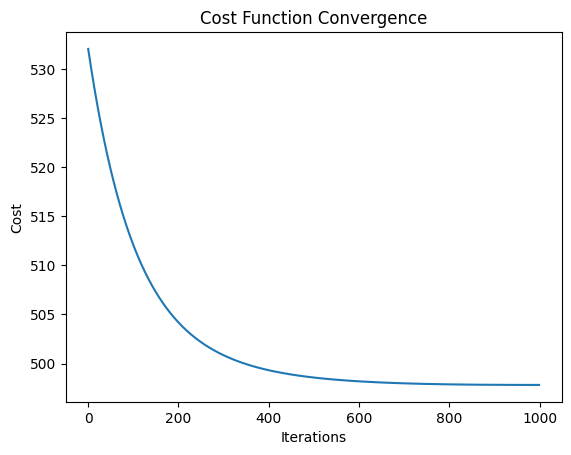

In [34]:
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()
